In [54]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [55]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [56]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [57]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [58]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

C:\Users\Fer\AppData\Local\Temp\ipykernel_21220\2338556962.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect = True)


In [59]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [60]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [61]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [62]:
# Find the most recent date in the data set.
Most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
Most_recent_date

'2017-08-23'

In [71]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
last_year = dt.datetime.strptime(Most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
rainfall_results = session.query(Measurement.date, func.avg(Measurement.prcp)).filter(Measurement.date >= last_year).group_by(Measurement.date).all()
rainfall_results

[('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 0.19499999999999998),
 ('2016-09-22', 

In [72]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
precipitation_df = pd.DataFrame(rainfall_results, columns =['Date','Precipitation'])
precipitation_df

,Date,Precipitation
0,2016-08-24,1.555000
1,2016-08-25,0.077143
2,2016-08-26,0.016667
3,2016-08-27,0.064000
4,2016-08-28,0.516667
...,...,...
360,2017-08-19,0.030000
361,2017-08-20,0.005000
362,2017-08-21,0.193333
363,2017-08-22,0.166667


In [73]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


<function matplotlib.pyplot.show(close=None, block=None)>

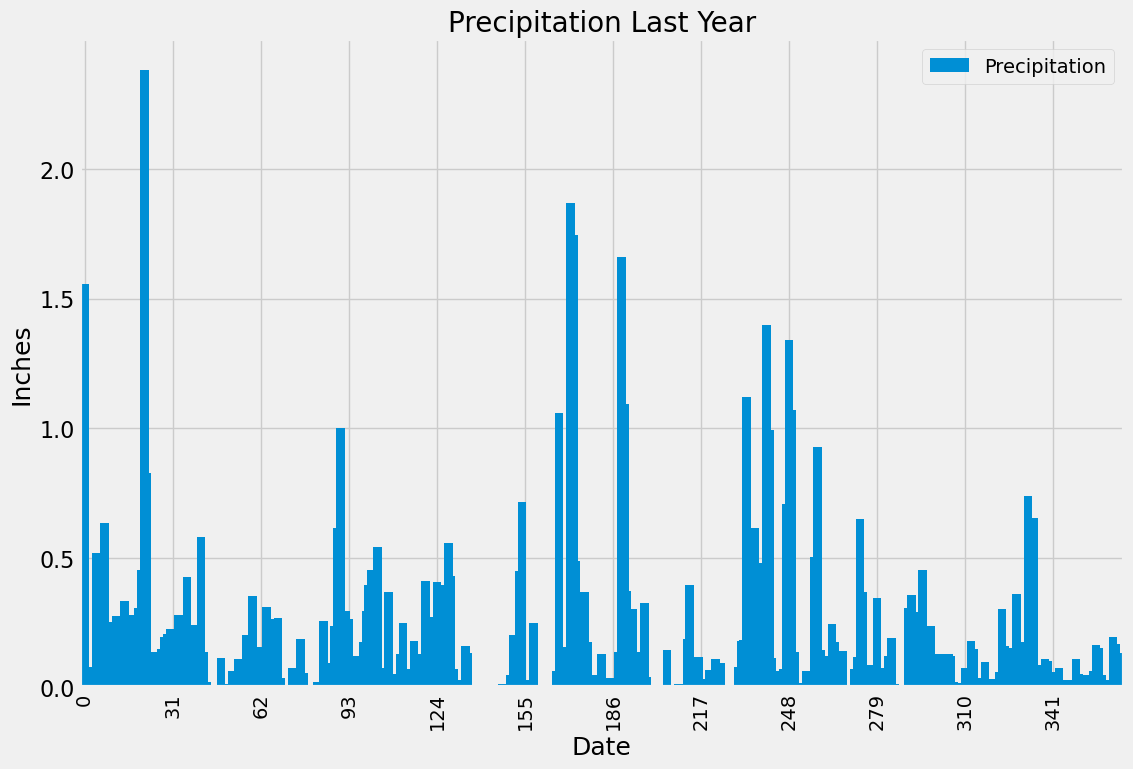

In [111]:
# Use Pandas Plotting with Matplotlib to plot the data
Bar = precipitation_df.plot(kind='bar', width=3, figsize=(12,8))
plt.locator_params(axis='x', nbins=12)
Bar.tick_params(axis='y', labelsize=16)
Bar.grid(True)
plt.title("Precipitation Last Year", size=20)
plt.ylabel("Inches", size=18)
plt.xlabel("Date", size=18)
plt.show

# Exploratory Station Analysis

In [105]:
# Design a query to calculate the total number of stations in the dataset
#session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
Total_stations = session.query(Station.id).count()
Total_stations

9

In [84]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
Most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
Most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [110]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#temp = tobs
most_active = Most_active_stations[0][0]
low_high_aveg_temp = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == most_active).all()
low_high_aveg_temp

[(54.0, 85.0, 71.66378066378067)]

<function matplotlib.pyplot.show(close=None, block=None)>

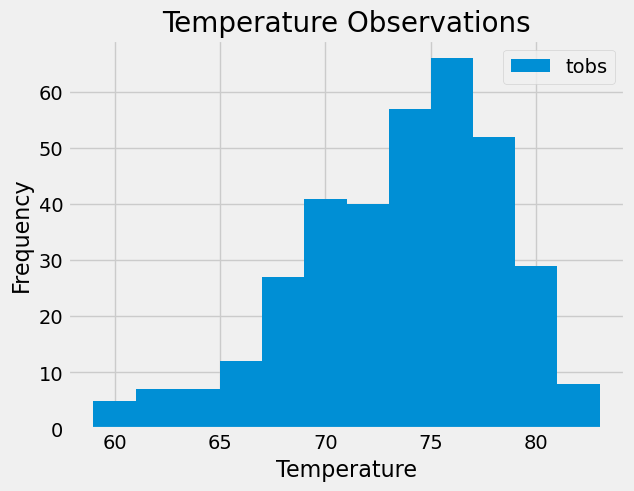

In [123]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# temp = tobs
most_active_year = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == most_active).filter(Measurement.date >= last_year).all()
temp_df = pd.DataFrame(most_active_year)

#Plotting Histogram
Histo_graph = temp_df.plot.hist(by='station', bins=12)
plt.grid(True)
plt.title("Temperature Observations", fontsize=20)
plt.xlabel("Temperature", fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show


# Close Session

In [16]:
# Close Session
session.close()